<a href="https://colab.research.google.com/github/satuelisa/ICN2024/blob/main/S6_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 6
## Computational complexity of network problems

Graph coloring

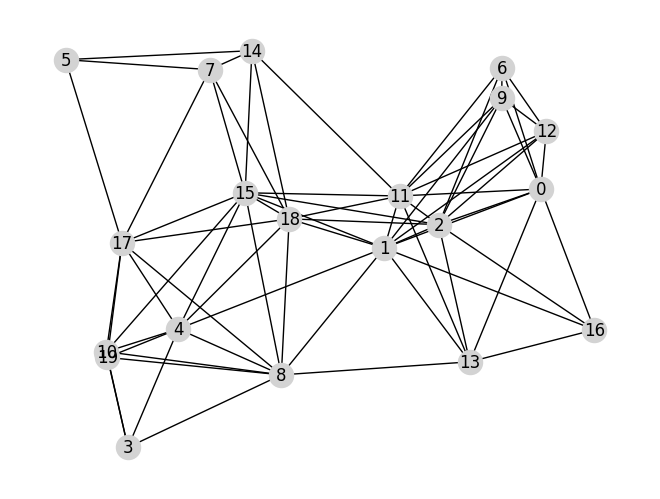

In [5]:
import networkx as nx
from random import random

n = 20 # order
r = 0.4 # radius
pos = { i: (random(), random()) for i in range(n) }
G = nx.random_geometric_graph(n, r, pos = pos)

coords = nx.get_node_attributes(G, 'pos')
nx.draw(G, coords, node_color = 'lightgray')
l = nx.draw_networkx_labels(G, pos = coords)

In [7]:
result = nx.coloring.greedy_color(G, strategy = 'largest_first')
print(result)

{1: 0, 2: 1, 11: 2, 15: 3, 8: 1, 18: 4, 0: 3, 4: 2, 17: 0, 9: 4, 10: 4, 12: 5, 13: 4, 6: 0, 7: 1, 14: 0, 19: 3, 3: 0, 16: 2, 5: 2}


In [8]:
used = set(result.values())
print(used)
count = len(used)

{0, 1, 2, 3, 4, 5}


In [9]:
import seaborn as sns

In [10]:
colors = sns.color_palette('husl', count)
colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

In [12]:
ca = []
for v in G.nodes():
  ca.append(colors[result[v]])
print(ca[:3])

[(0.21044753832183283, 0.6773105080456748, 0.6433941168468681), (0.9677975592919913, 0.44127456009157356, 0.5358103155058701), (0.7350228985632719, 0.5952719904750953, 0.1944419133847522)]


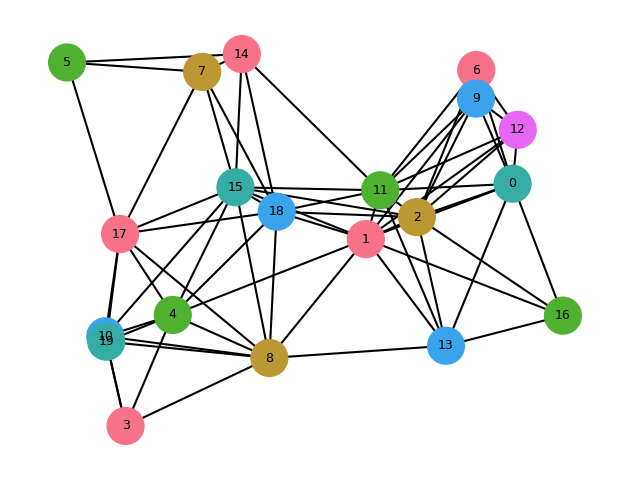

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (4, 3), dpi =  150)
coords = nx.get_node_attributes(G, 'pos')
nx.draw(G, coords, node_color = ca)
l = nx.draw_networkx_labels(G, pos = coords, font_size = 6)

Network flow

In [15]:
n = 10
m = n + 10

import networkx as nx

attempts = 50
while attempts > 0:
  U = nx.gnm_random_graph(n, m)
  if nx.is_connected(U):
    print('Connected!')
    break
  attempts -= 1

if attempts == 0:
  print('Try again with more edges')
else:
  print('Good to go', G)

Connected!
Good to go Graph with 20 nodes and 69 edges


In [16]:
G = U.to_directed(U) # orient the edges
from random import random

keep = set()
for u, v in G.edges():
    if random() < 0.5 and (v, u) not in keep:
      keep.add((u, v))
    elif (u, v) not in keep:
      keep.add((v, u))

for u in G.nodes():
    for v in G.nodes():
      if G.has_edge(u, v):
        if not (u, v) in keep:
          G.remove_edge(u, v)

print(G)

DiGraph with 10 nodes and 20 edges


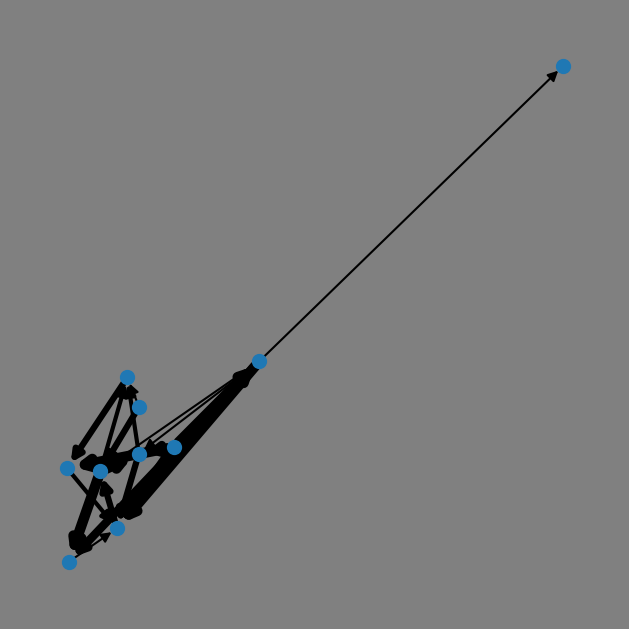

In [18]:
from random import randint
low = 1
high = 5
for u, v in G.edges():
  G[u][v]['capacity'] = randint(low, high)

w = [ G[u][v]['capacity'] for u, v in G.edges ]
L = nx.spring_layout(G)

fig = plt.figure(1, figsize = (4, 4), dpi =  150)
nx.draw(G, pos = L, width = w, node_size = 40)
fig.set_facecolor('gray')
plt.show()

In [19]:
highest = 0
pair = None
config = None

for s in G.nodes(): # all possible sources
  for t in G.nodes(): # all possible sinks
    if s != t: # makes little sense for the same node to be both source and sink
      maxflow = nx.maximum_flow(G, s, t)
      value = maxflow[0] # maximum flow in units
      flow = maxflow[1] # a dictionary of the flow on each edge (as an adjacency list)
      active = sum( [ sum( [ f > 0 for f in flow[v].values() ] ) for v in flow ] )
      if value > 1 and active > 1: # see the interesting ones (more than one unit flows along two or more edges)
        if value > highest:
            print(f'A new record: total flow of {value} units from {s} to {t} along {active} edges')
            highest = value
            pair = (s, t)
            config = flow

A new record: total flow of 5 units from 0 to 2 along 4 edges
A new record: total flow of 6 units from 6 to 2 along 8 edges
A new record: total flow of 8 units from 7 to 2 along 7 edges
A new record: total flow of 9 units from 8 to 0 along 9 edges
A new record: total flow of 15 units from 8 to 2 along 7 edges


In [20]:
status = dict()
for v in config:
  for (u, units) in config[v].items():
    if units > 0:
      G[v][u]['flow'] = units
      cap = G[v][u]['capacity']
      status[(u, v)] = f'{units}/{cap}'

8 2 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


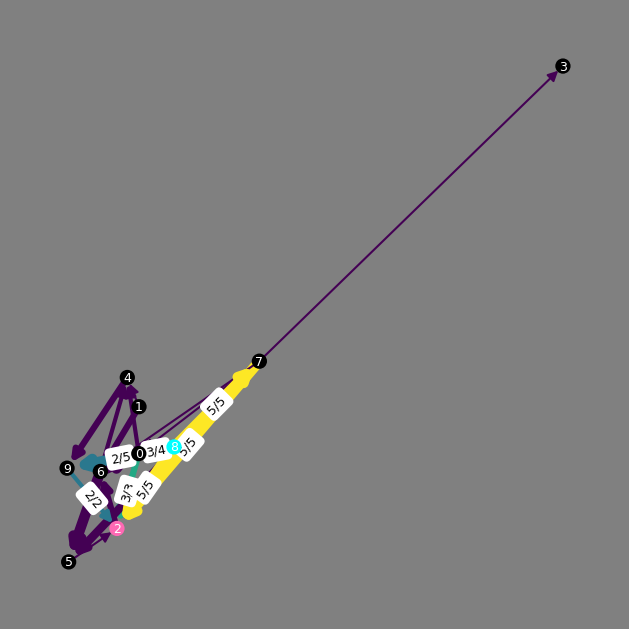

In [21]:
f = [ G[u][v]['capacity'] for u, v in G.edges ]
c = [ G[u][v].get('flow', 0) for u, v in G.edges ]

(s, t) = pair
print(s, t, G.nodes)
Vc = [ 'cyan' if v == s else ('hotpink' if v == t else 'black') for v in G.nodes ]

fig = plt.figure(1, figsize = (4, 4), dpi =  150)
nx.draw(G, pos = L, width = f, node_size = 40, node_color = Vc, edge_color = c, cmap = plt.cm.Greens)
nx.draw_networkx_edge_labels(G, L, status, font_size = 6)
nx.draw_networkx_labels(G, L, font_size = 6, font_color='white')
fig.set_facecolor('gray')
plt.show()

Travelling salesperson problem (TSP)

In [24]:
t = 30 # how many towns
p = nx.Graph() # province

for i in range(t):
  x = random()
  y = random()
  p.add_node(i, pos = (x, y)) # call the towns 0, 1, 2, ...

from math import sqrt

def distance(p1, p2):
  (x1, y1) = p1
  (x2, y2) = p2
  return sqrt((x1 - x2)**2 + (y1 - y2)**2)

for t1 in p.nodes:
  l1 = p.nodes[t1]['pos']
  for t2 in p.nodes:
    if t1 != t2:
      l2 = p.nodes[t2]['pos']
      cost = distance(l1, l2)
      p.add_edge(t1, t2, weight = cost)

In [25]:
c = nx.approximation.traveling_salesman_problem(p)
print(c)

[0, 17, 1, 18, 4, 13, 27, 3, 23, 24, 21, 12, 14, 10, 9, 16, 28, 6, 7, 26, 11, 15, 5, 2, 20, 8, 19, 25, 22, 29, 0]
